In [1]:
import sys
print(sys.executable)


c:\Users\Sai Pavan\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
%pip install fastf1 pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

print("Environment ready 🚀")


Environment ready 🚀


In [3]:
import os
os.makedirs("f1_cache", exist_ok=True)


In [4]:
import fastf1

fastf1.Cache.enable_cache("f1_cache")

race = fastf1.get_session(2024, "Monaco", "R")
race.load()

print("Monaco 2024 race data loaded 🏎️🔥")


core           INFO 	Loading data for Monaco Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

Monaco 2024 race data loaded 🏎️🔥


In [5]:
race.laps.head()


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:36:02.319000,LEC,16,0 days 00:40:56.330000,1.0,1.0,NaT,0 days 00:56:45.433000,NaT,0 days 00:00:46.389000,...,True,Ferrari,0 days 00:55:05.680000,2024-05-26 13:03:11.069,1254,1.0,False,,False,False
1,0 days 01:39:00.140000,LEC,16,NaT,2.0,2.0,0 days 01:36:03.182000,NaT,0 days 00:00:26.854000,0 days 00:00:41.743000,...,True,Ferrari,0 days 01:35:54.733000,2024-05-26 13:44:00.122,14,1.0,False,,False,False
2,0 days 01:40:24.764000,LEC,16,0 days 00:01:24.624000,3.0,2.0,NaT,NaT,0 days 00:00:24.007000,0 days 00:00:38.235000,...,True,Ferrari,0 days 01:39:00.140000,2024-05-26 13:47:05.529,1,1.0,False,,False,True
3,0 days 01:41:47.389000,LEC,16,0 days 00:01:22.625000,4.0,2.0,NaT,NaT,0 days 00:00:21.892000,0 days 00:00:38.779000,...,True,Ferrari,0 days 01:40:24.764000,2024-05-26 13:48:30.153,1,1.0,False,,False,True
4,0 days 01:43:09.184000,LEC,16,0 days 00:01:21.795000,5.0,2.0,NaT,NaT,0 days 00:00:21.314000,0 days 00:00:38.513000,...,True,Ferrari,0 days 01:41:47.389000,2024-05-26 13:49:52.778,1,1.0,False,,False,True


In [6]:
# Basic info about laps data
laps = race.laps

print("Total laps rows:", len(laps))
laps.head()


Total laps rows: 1237


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:36:02.319000,LEC,16,0 days 00:40:56.330000,1.0,1.0,NaT,0 days 00:56:45.433000,NaT,0 days 00:00:46.389000,...,True,Ferrari,0 days 00:55:05.680000,2024-05-26 13:03:11.069,1254,1.0,False,,False,False
1,0 days 01:39:00.140000,LEC,16,NaT,2.0,2.0,0 days 01:36:03.182000,NaT,0 days 00:00:26.854000,0 days 00:00:41.743000,...,True,Ferrari,0 days 01:35:54.733000,2024-05-26 13:44:00.122,14,1.0,False,,False,False
2,0 days 01:40:24.764000,LEC,16,0 days 00:01:24.624000,3.0,2.0,NaT,NaT,0 days 00:00:24.007000,0 days 00:00:38.235000,...,True,Ferrari,0 days 01:39:00.140000,2024-05-26 13:47:05.529,1,1.0,False,,False,True
3,0 days 01:41:47.389000,LEC,16,0 days 00:01:22.625000,4.0,2.0,NaT,NaT,0 days 00:00:21.892000,0 days 00:00:38.779000,...,True,Ferrari,0 days 01:40:24.764000,2024-05-26 13:48:30.153,1,1.0,False,,False,True
4,0 days 01:43:09.184000,LEC,16,0 days 00:01:21.795000,5.0,2.0,NaT,NaT,0 days 00:00:21.314000,0 days 00:00:38.513000,...,True,Ferrari,0 days 01:41:47.389000,2024-05-26 13:49:52.778,1,1.0,False,,False,True


In [7]:
laps.columns


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [8]:
laps_clean = laps[
    ['Driver', 'LapNumber', 'LapTime', 'Compound', 'TyreLife', 'Stint']
].copy()


In [9]:
# Convert LapTime to seconds (numeric)
laps_clean['LapTime_s'] = laps_clean['LapTime'].dt.total_seconds()

# Drop missing values
laps_clean = laps_clean.dropna(subset=['LapTime_s', 'Compound'])

laps_clean.head()


,Driver,LapNumber,LapTime,Compound,TyreLife,Stint,LapTime_s
0,LEC,1.0,0 days 00:40:56.330000,MEDIUM,1.0,1.0,2456.330
2,LEC,3.0,0 days 00:01:24.624000,HARD,2.0,2.0,84.624
3,LEC,4.0,0 days 00:01:22.625000,HARD,3.0,2.0,82.625
4,LEC,5.0,0 days 00:01:21.795000,HARD,4.0,2.0,81.795
5,LEC,6.0,0 days 00:01:21.145000,HARD,5.0,2.0,81.145


In [10]:
avg_tyre_pace = (
    laps_clean
    .groupby('Compound')['LapTime_s']
    .mean()
    .reset_index()
    .sort_values('LapTime_s')
)

avg_tyre_pace


,Compound,LapTime_s
2,SOFT,78.556441
0,HARD,104.479551
1,MEDIUM,127.650338


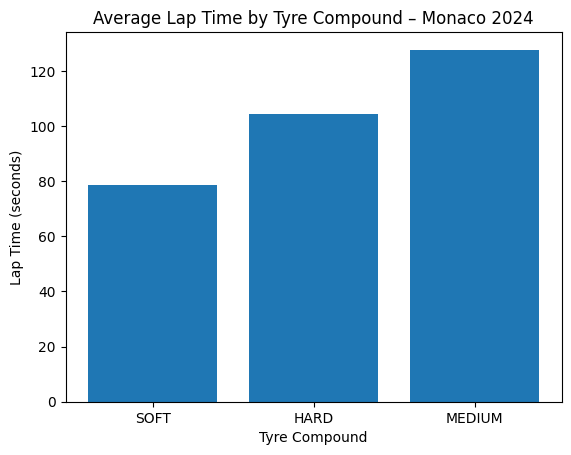

In [11]:
import matplotlib.pyplot as plt

plt.bar(avg_tyre_pace['Compound'], avg_tyre_pace['LapTime_s'])
plt.title("Average Lap Time by Tyre Compound – Monaco 2024")
plt.xlabel("Tyre Compound")
plt.ylabel("Lap Time (seconds)")
plt.show()


In [12]:
driver_tyre_avg = (
    laps_clean
    .groupby(['Driver', 'Compound'])['LapTime_s']
    .mean()
    .reset_index()
)

driver_tyre_avg.head()


,Driver,Compound,LapTime_s
0,ALB,HARD,80.984066
1,ALB,MEDIUM,2494.817000
2,ALO,HARD,2513.184000
3,ALO,MEDIUM,81.149653
4,BOT,HARD,119.222145


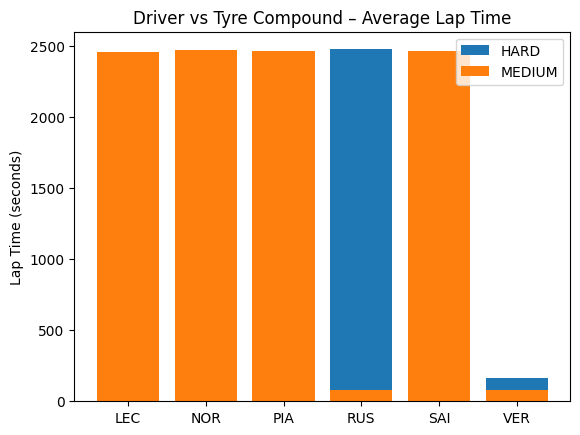

In [13]:
top_drivers = laps_clean['Driver'].value_counts().head(6).index

subset = driver_tyre_avg[driver_tyre_avg['Driver'].isin(top_drivers)]

for compound in subset['Compound'].unique():
    data = subset[subset['Compound'] == compound]
    plt.bar(data['Driver'], data['LapTime_s'], label=compound)

plt.title("Driver vs Tyre Compound – Average Lap Time")
plt.ylabel("Lap Time (seconds)")
plt.legend()
plt.show()


In [14]:
laps_clean.to_csv("monaco_2024_laps_clean.csv", index=False)
driver_tyre_avg.to_csv("monaco_2024_driver_tyre_summary.csv", index=False)

print("CSV files exported for Tableau & Power BI ✅")


CSV files exported for Tableau & Power BI ✅


In [15]:
pit_stops = race.pit_stops.copy()
pit_stops.head()


AttributeError: 'Session' object has no attribute 'pit_stops'

In [16]:
# Identify pit stop laps from laps data
pit_laps = laps_clean[laps['PitInTime'].notna()].copy()

pit_laps[['Driver', 'LapNumber', 'PitInTime', 'PitOutTime']].head()


C:\Users\Sai Pavan\AppData\Local\Temp\ipykernel_22152\2285962470.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pit_laps = laps_clean[laps['PitInTime'].notna()].copy()


KeyError: "['PitInTime', 'PitOutTime'] not in index"

In [17]:
# Identify pit stop laps from ORIGINAL laps dataframe
pit_laps = laps[laps['PitInTime'].notna()].copy()

pit_laps[['Driver', 'LapNumber', 'PitInTime', 'PitOutTime']].head()


,Driver,LapNumber,PitInTime,PitOutTime
0,LEC,1.0,0 days 00:56:45.433000,NaT
78,PIA,1.0,0 days 00:56:48.100000,NaT
156,SAI,1.0,0 days 00:57:22.741000,NaT
234,NOR,1.0,0 days 00:56:49.559000,NaT
312,RUS,1.0,0 days 00:56:51.329000,NaT


In [18]:
# Convert pit times to seconds
pit_laps['PitInTime_s'] = pit_laps['PitInTime'].dt.total_seconds()
pit_laps['PitOutTime_s'] = pit_laps['PitOutTime'].dt.total_seconds()

# Pit stop duration
pit_laps['PitDuration_s'] = pit_laps['PitOutTime_s'] - pit_laps['PitInTime_s']

pit_laps[['Driver', 'LapNumber', 'PitDuration_s']].head()


,Driver,LapNumber,PitDuration_s
0,LEC,1.0,NaN
78,PIA,1.0,NaN
156,SAI,1.0,NaN
234,NOR,1.0,NaN
312,RUS,1.0,NaN


In [19]:
pit_count = (
    pit_laps
    .groupby('Driver')
    .size()
    .reset_index(name='NumPitStops')
)

pit_count.head()


,Driver,NumPitStops
0,ALB,1
1,ALO,1
2,BOT,2
3,GAS,1
4,HAM,2


In [20]:
avg_pit_time = (
    pit_laps
    .groupby('Driver')['PitDuration_s']
    .mean()
    .reset_index()
    .sort_values('PitDuration_s')
)

avg_pit_time.head()


,Driver,PitDuration_s
0,ALB,NaN
1,ALO,NaN
2,BOT,NaN
3,GAS,NaN
4,HAM,NaN


In [21]:
# Average lap time per driver
driver_lap_avg = (
    laps_clean
    .groupby('Driver')['LapTime_s']
    .mean()
    .reset_index(name='AvgLapTime_s')
)

# Final position per driver
final_positions = (
    laps_clean
    .sort_values('LapNumber')
    .groupby('Driver')
    .last()
    .reset_index()[['Driver', 'Position']]
)

# Merge ML dataset
ml_df = (
    driver_lap_avg
    .merge(pit_count, on='Driver', how='left')
    .merge(final_positions, on='Driver', how='left')
)

ml_df.fillna(0, inplace=True)
ml_df.head()


KeyError: "['Position'] not in index"

In [22]:
race.results[['Abbreviation', 'Position']].head()


,Abbreviation,Position
16,LEC,1.0
81,PIA,2.0
55,SAI,3.0
4,NOR,4.0
63,RUS,5.0


In [23]:
final_positions = (
    race.results[['Abbreviation', 'Position']]
    .rename(columns={'Abbreviation': 'Driver'})
)

final_positions.head()


,Driver,Position
16,LEC,1.0
81,PIA,2.0
55,SAI,3.0
4,NOR,4.0
63,RUS,5.0


In [24]:
# Average lap time per driver
driver_lap_avg = (
    laps_clean
    .groupby('Driver')['LapTime_s']
    .mean()
    .reset_index(name='AvgLapTime_s')
)

# Merge ML dataset correctly
ml_df = (
    driver_lap_avg
    .merge(pit_count, on='Driver', how='left')
    .merge(final_positions, on='Driver', how='left')
)

ml_df.fillna(0, inplace=True)
ml_df.head()


,Driver,AvgLapTime_s,NumPitStops,Position
0,ALB,112.332545,1,9.0
1,ALO,113.150105,1,11.0
2,BOT,113.158447,2,13.0
3,GAS,112.412922,1,10.0
4,HAM,109.839610,2,7.0


In [25]:
ml_df.isna().sum()


Driver          0
AvgLapTime_s    0
NumPitStops     0
Position        0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Features & target
X = ml_df[['AvgLapTime_s', 'NumPitStops']]
y = ml_df['Position']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Model
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 1.305333333333333
R²: 0.7912088122605365


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


AvgLapTime_s    0.930445
NumPitStops     0.069555
dtype: float64

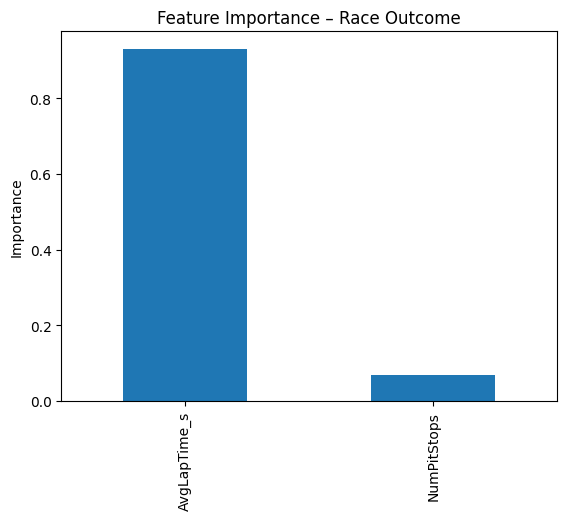

In [28]:
importance.plot(kind='bar', title='Feature Importance – Race Outcome')
plt.ylabel('Importance')
plt.show()


In [29]:
laps_clean.to_csv("monaco_2024_laps_clean.csv", index=False)
pit_count.to_csv("monaco_2024_pit_strategy.csv", index=False)
ml_df.to_csv("monaco_2024_ml_driver_summary.csv", index=False)

print("All final datasets exported ✅")


All final datasets exported ✅
